In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Microsoft_Stock.csv', parse_dates=['Date'], index_col='Date')
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476
2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692
2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375
2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1511 entries, 2015-04-01 16:00:00 to 2021-03-31 16:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1511 non-null   float64
 1   High    1511 non-null   float64
 2   Low     1511 non-null   float64
 3   Close   1511 non-null   float64
 4   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 70.8 KB


In [4]:
df.describe()

,Open,High,Low,Close,Volume
count,1511.000000,1511.000000,1511.000000,1511.000000,1.511000e+03
mean,107.385976,108.437472,106.294533,107.422091,3.019863e+07
std,56.691333,57.382276,55.977155,56.702299,1.425266e+07
min,40.340000,40.740000,39.720000,40.290000,1.016120e+05
25%,57.860000,58.060000,57.420000,57.855000,2.136213e+07
50%,93.990000,95.100000,92.920000,93.860000,2.662962e+07
75%,139.440000,140.325000,137.825000,138.965000,3.431962e+07
max,245.030000,246.130000,242.920000,244.990000,1.352271e+08


In [5]:
df.drop(columns=['Open','Volume','High','Low'], inplace=True)

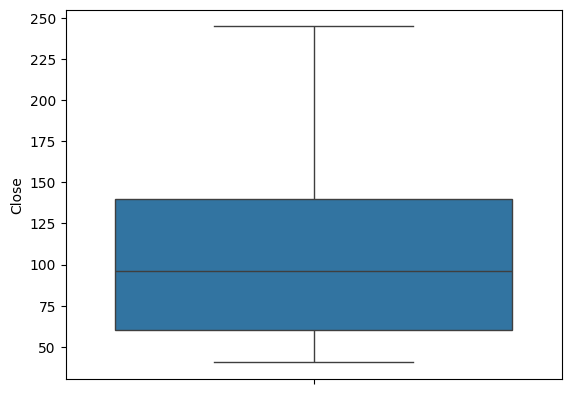

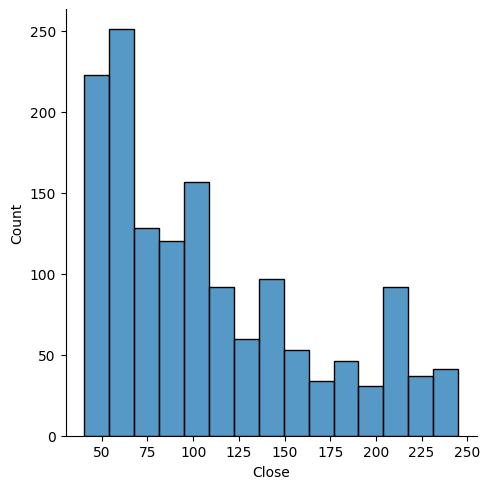

In [22]:
sns.boxplot(df['Close'])
sns.displot(df['Close'])
plt.show()

C:\Users\korez\AppData\Local\Temp\ipykernel_19972\659195609.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


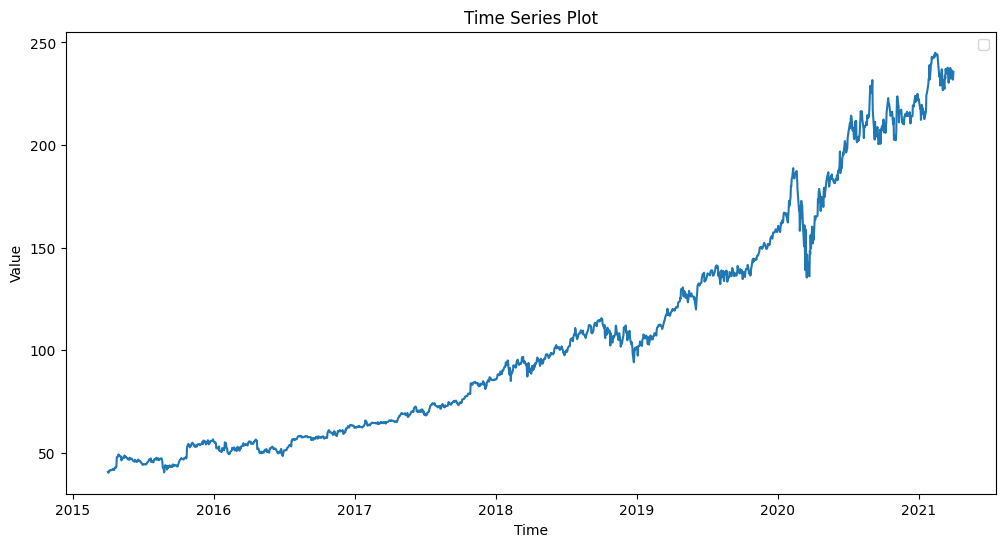

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'])
plt.title('Time Series Plot')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

C:\Users\korez\AppData\Local\Temp\ipykernel_19972\554300869.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


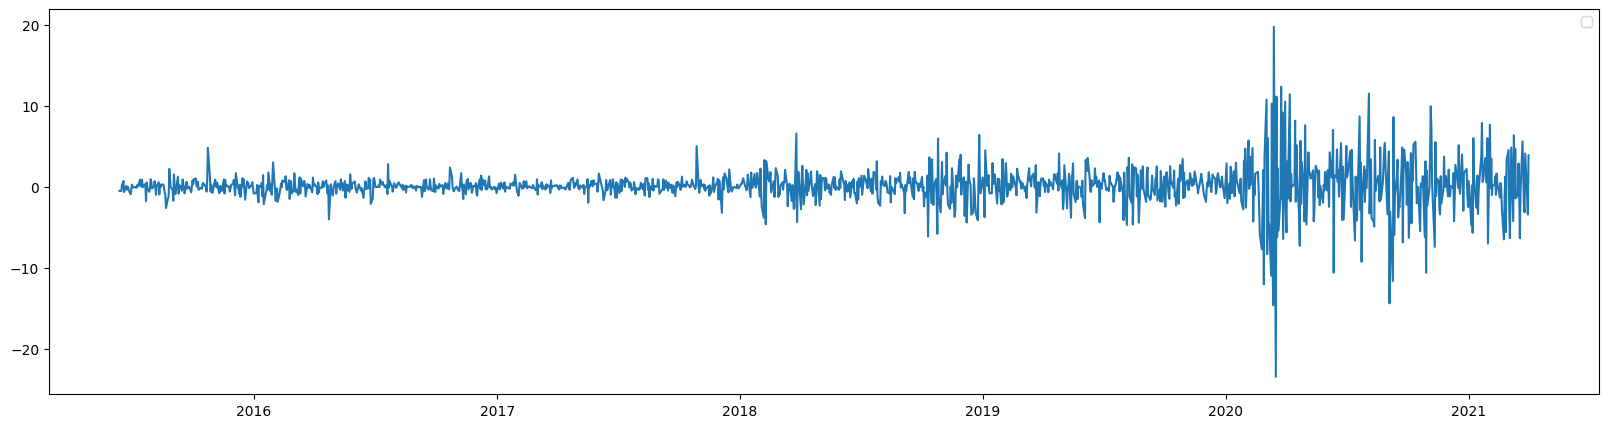

In [37]:
df['diff'] = df['Close'].diff().dropna()
plt.figure(figsize=(20,5))
plt.plot(df['diff'])
plt.legend()
plt.show()

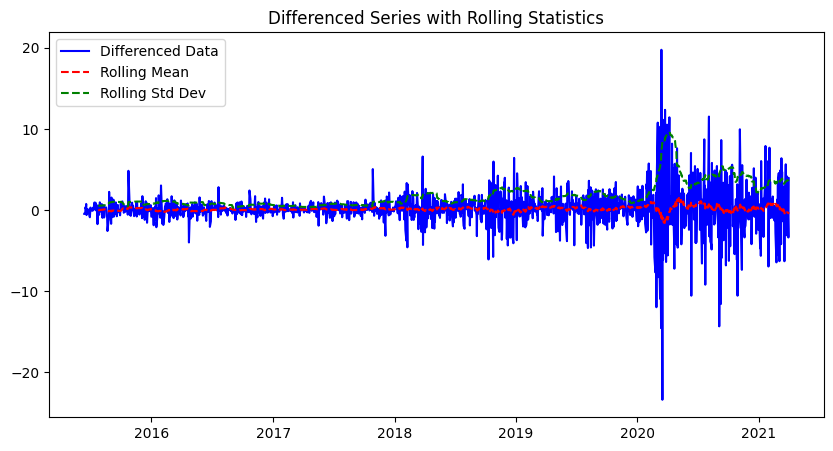

In [41]:
rolling_mean = df['diff'].rolling(30).mean()
rolling_std = df['diff'].rolling(30).std()

plt.figure(figsize=(10, 5))
plt.plot(df['diff'], label='Differenced Data', color='blue')
plt.plot(rolling_mean, label='Rolling Mean', linestyle='dashed', color='red')
plt.plot(rolling_std, label='Rolling Std Dev', linestyle='dashed', color='green')
plt.legend()
plt.title("Differenced Series with Rolling Statistics")
plt.show()

In [44]:
from statsmodels.tsa.stattools import adfuller

# Run ADF test on Closing Price
result = adfuller(df['Close'].dropna())

# Print results
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
if result[1] <= 0.05:
    print("The time series is stationary.")
else:
    print("The time series is non-stationary.")

ADF Statistic: 1.6289586341384195
p-value: 0.9979419055663391
The time series is non-stationary.


In [10]:
df['MA20'] = df['Close'].rolling(20).mean()
df['MA50'] = df['Close'].rolling(50).mean()

In [11]:
delta = df['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = delta.where(delta < 0, 0)
ag = gain.rolling(21).mean()
al = loss.rolling(21).mean()
rs = ag / al
df['rsi'] = 100 - (100 / (1+rs))

In [12]:
df['std'] = df['Close'].rolling(20).std()
df['upper band'] = df['MA20'] + (df['std'] * 2)
df['lower band'] = df['MA50'] - (df['std'] * 2)

In [13]:
df.dropna(inplace=True)
df.head()

,Close,MA20,MA50,rsi,std,upper band,lower band
Date,,,,,,,
2015-06-11 16:00:00,46.44,47.0475,45.6266,-408.791209,0.807106,48.661712,44.012388
2015-06-12 16:00:00,45.97,46.9100,45.7316,-207.228916,0.738512,48.387024,44.254576
2015-06-15 16:00:00,45.48,46.7690,45.8354,-72.530864,0.728292,48.225584,44.378816
2015-06-16 16:00:00,45.83,46.6600,45.9210,-109.311741,0.695164,48.050327,44.530673
2015-06-17 16:00:00,45.97,46.5795,46.0098,-139.215686,0.675975,47.931449,44.657851


In [14]:
x = df.drop(columns='Close')
y = df['Close']

In [15]:
def strat(x,y,train_size):
    np.random.seed(42)
    yidx = {}
    for i,label in enumerate(y):
        if label not in yidx:
            yidx[label] = [i]
        else:
            yidx[label].append(i)
            
    tridx = []
    teidx = []
    
    for i,label in yidx.items():
        shuffle = np.random.permutation(label)
        train = max(1, int(len(shuffle) * train_size))
        tridx.extend(shuffle[:train])
        teidx.extend(shuffle[train:])
        
    xtr = x.iloc[tridx].reset_index(drop=True)
    xte = x.iloc[teidx].reset_index(drop=True)
    ytr = y.iloc[tridx].reset_index(drop=True)
    yte = y.iloc[teidx].reset_index(drop=True)
    
    return xtr,xte,ytr,yte

In [16]:
xtr,xte,ytr,yte = strat(x,y,train_size=0.8)

In [17]:
print(xtr.shape)
print(xte.shape)
print(ytr.shape)
print(yte.shape)

(1360, 6)
(102, 6)
(1360,)
(102,)


In [18]:
def minmaxscaler(xtr):
    minim = min(xtr)
    maxim = max(xtr)
    norm = (xtr - minim) / (maxim - minim)
    return norm, minim,maxim

In [19]:
xtr

,MA20,MA50,rsi,std,upper band,lower band
0,47.0475,45.6266,-408.791209,0.807106,48.661712,44.012388
1,46.5795,46.0098,-139.215686,0.675975,47.931449,44.657851
2,46.7690,45.8354,-72.530864,0.728292,48.225584,44.378816
3,46.6600,45.9210,-109.311741,0.695164,48.050327,44.530673
4,46.5365,46.1158,-417.441860,0.635099,47.806697,44.845603
...,...,...,...,...,...,...
1355,233.3775,233.9160,-1540.723982,3.495290,240.368080,226.925420
1356,233.5825,234.3188,509.879840,3.553456,240.689412,227.211888
1357,233.4975,234.7632,1216.783217,3.488658,240.474816,227.785884
1358,233.3965,235.1472,-594.106090,3.506501,240.409502,228.134198


In [20]:
norm, minim, maxim = minmaxscaler(xtr)

UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('float64'), dtype('<U4')) -> None